# Using R magics

##Magics

The following cells will load the r magics, display documentation on IPython magic and (if you scroll down in the secondary window) R magics. The final cell will show all the availiable magic commands.

In [34]:
# This will load the r magics commands %R (line magic: only the line that follows it is written in R) 
# and %%R (cell magic: indicates that the whole cell is written in R.)
# You MUST run this line to make the R magic availiable.
%load_ext rmagic  

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [31]:
# use this command to open a window along the bottom of the page 
# with a tutorial on using ipython magics.
%magic

In [ ]:
#you can use the ?? notation to get help on a magic function, like so:
%R??

In [32]:
#use this command to see the availiable magic commands
%lsmagic

##Importing Data with R, Python, and passing between them

###Import data with R and pass it to python

You can import data using R and work with it in python.

In [26]:
#import the data from R and pass to python interpreter so that you can axcess it with python
sample2 = %R sampledata2 <- read.table("sampledata.txt", header=T, sep=",")

#note the difference between viewing sample2 with print and viewing sample2 as output.
print sample2
sample2

   ID Sex Age
1   1   1  34
2   2   1  33
3   3   2  40
4   4   1  28
5   5   2  37
6   6   2  29
7   7   2  41
8   8   2  44
9   9   1  37
10 10   2  35
11 11   1  43
12 12   1  30
13 13   1  31
14 14   1  40
15 15   2  38
16 16   1  42
17 17   2  27
18 18   1  29
19 19   2  36
20 20   2  36



<DataFrame - Python:0x10ab5bb00 / R:0x108666b18>
[IntVector, IntVector, IntVector]
  ID: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x10ab5bab8 / R:0x1019690a8>
[       1,        2,        3, ...,       18,       19,       20]
  Sex: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x10ab5b710 / R:0x10196d348>
[       1,        1,        2, ...,        1,        2,        2]
  Age: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x1020bfd40 / R:0x10196ceb0>
[      34,       33,       40, ...,       29,       36,       36]

###Using Flags (to pass back and forth between Python and R)
####Import data with Python and pass it to R, Edit, then pass back to Python

You can also import data in python and pass it to R with the <b>-i flag </b>, which should be on the same line you invoke the R magics. There is also a <b>-o flag</b> for outputting data from R to python. It should go on the same line as the input flag (-i) and should be followed by the name of the R variable that you want to transfer to the ipython interpreter. You can use these flags with both line magics (%R) and cell magics (%%R).

Single-line R magic:

```
Python code here
%R -i data -o newdata #R code to convert data to newdata
Python code here can operate on newdata
```

Whole-cell R magic:

```
%%R -i data -o newdata 
# R code to convert data to newdata
# the next python cell will be able to operate on newdata
```


There are other flags and arguments availiable:
```
@argument(
    '-i', '--input', action='append',
    help='Names of input variable from shell.user_ns to be assigned to R variables of the same names after calling self.pyconverter. Multiple names can be passed separated only by commas with no whitespace.'
    )
@argument(
    '-o', '--output', action='append',
    help="Names of variables to be pushed from rpy2 to shell.user_ns after executing cell body (rpy2's internal facilities will apply ri2ro as appropriate). Multiple names can be passed separated only by commas with no whitespace."
    )
@argument(
    '-n', '--noreturn',
    help='Force the magic to not return anything.',
    action='store_true',
    default=False
    )

@argument_group("Plot", "Arguments to plotting device")
@argument(
    '-w', '--width', type=int,
    help='Width of plotting device in R.'
    )
@argument(
    '-h', '--height', type=int,
    help='Height of plotting device in R.'
    )
@argument(
    '-p', '--pointsize', type=int,
    help='Pointsize of plotting device in R.'
    )
@argument(
    '-b', '--bg',
    help='Background of plotting device in R.'
    )

@argument_group("SVG", "SVG specific arguments")
@argument(
    '--noisolation',
    help=('Disable SVG isolation in the Notebook. By default, SVGs are isolated to avoid namespace collisions between figures.'
          'Disabling SVG isolation allows to reference previous figures or share CSS rules across a set of SVGs.'),
    action='store_false',
    default=True,
    dest='isolate_svgs'
    )

@argument_group("PNG", "PNG specific arguments")
@argument(
    '-u', '--units', type=unicode, choices=["px", "in", "cm", "mm"],
    help='Units of png plotting device sent as an argument to *png* in R. One of ["px", "in", "cm", "mm"].'
    )
@argument(
    '-r', '--res', type=int,
    help='Resolution of png plotting device sent as an argument to *png* in R. Defaults to 72 if *units* is one of ["in", "cm", "mm"].'
    )
@argument(
    'code',
    nargs='*',
    )
```

In [7]:
import pandas as pd

In [8]:
sample = pd.read_excel('sampledata.xlsx')
sample.head()

,ID,Sex,Age,Weight,Weight2,Disease,Disease2
0,1,1,34,145,200,1,1
1,2,1,33,155,225,1,1
2,3,2,40,174,211,1,1
3,4,1,28,200,199,0,1
4,5,2,37,124,145,0,1


In [13]:
# pass in sample from python interpreter, 
# get the summary using R, 
# print the summary from R interpreter
%R -i sample -o samp_summary samp_summary = summary(sample); print(samp_summary);

       ID             Sex           Age            Weight         Weight2     
 Min.   : 1.00   Min.   :1.0   Min.   :27.00   Min.   : 99.0   Min.   :145.0  
 1st Qu.: 5.75   1st Qu.:1.0   1st Qu.:30.75   1st Qu.:127.0   1st Qu.:195.2  
 Median :10.50   Median :1.5   Median :36.00   Median :150.0   Median :207.5  
 Mean   :10.50   Mean   :1.5   Mean   :35.50   Mean   :151.4   Mean   :217.8  
 3rd Qu.:15.25   3rd Qu.:2.0   3rd Qu.:40.00   3rd Qu.:172.5   3rd Qu.:244.8  
 Max.   :20.00   Max.   :2.0   Max.   :44.00   Max.   :234.0   Max.   :299.0  
    Disease       Disease2  
 Min.   :0.0   Min.   :0.0  
 1st Qu.:0.0   1st Qu.:0.0  
 Median :0.5   Median :1.0  
 Mean   :0.5   Mean   :0.7  
 3rd Qu.:1.0   3rd Qu.:1.0  
 Max.   :1.0   Max.   :1.0  


In [11]:
#print the passed-back summary from python interpreter
print samp_summary 

       ID             Sex           Age            Weight         Weight2     
 Min.   : 1.00   Min.   :1.0   Min.   :27.00   Min.   : 99.0   Min.   :145.0  
 1st Qu.: 5.75   1st Qu.:1.0   1st Qu.:30.75   1st Qu.:127.0   1st Qu.:195.2  
 Median :10.50   Median :1.5   Median :36.00   Median :150.0   Median :207.5  
 Mean   :10.50   Mean   :1.5   Mean   :35.50   Mean   :151.4   Mean   :217.8  
 3rd Qu.:15.25   3rd Qu.:2.0   3rd Qu.:40.00   3rd Qu.:172.5   3rd Qu.:244.8  
 Max.   :20.00   Max.   :2.0   Max.   :44.00   Max.   :234.0   Max.   :299.0  
    Disease       Disease2  
 Min.   :0.0   Min.   :0.0  
 1st Qu.:0.0   1st Qu.:0.0  
 Median :0.5   Median :1.0  
 Mean   :0.5   Mean   :0.7  
 3rd Qu.:1.0   3rd Qu.:1.0  
 Max.   :1.0   Max.   :1.0  



In [ ]:
or like this...

In [14]:
#my computer refuses to complete this line, maybe yours won't.
%R -i sample View(sample$Sex)

Error in check_for_XQuartz() : 
  X11 library is missing: install XQuartz from xquartz.macosforge.org


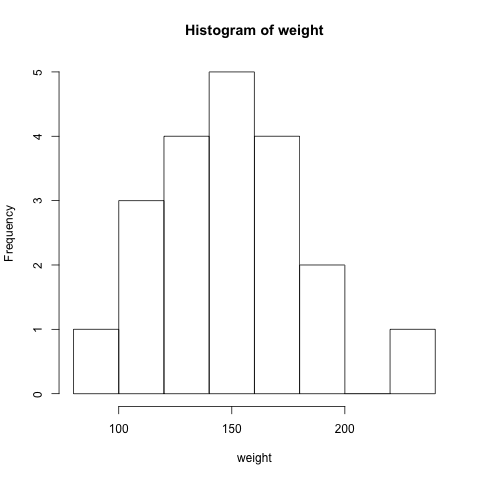

In [15]:
%%R -i sample
weight <- sample$Weight
hist(weight)

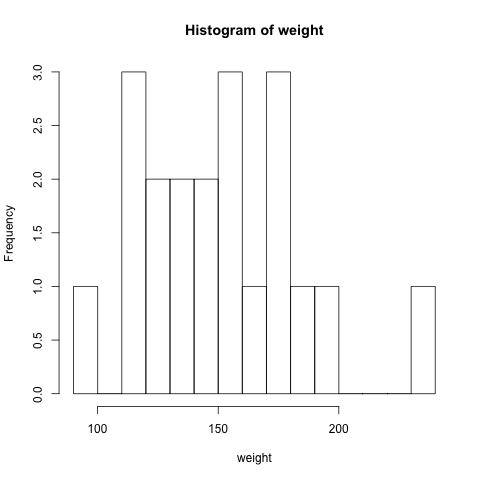

In [42]:
%%R
hist(weight, breaks=10)

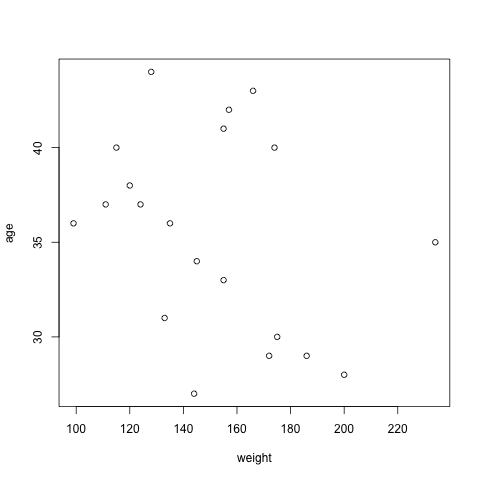

In [34]:
%%R -i sample
age = sample$Age
plot(weight, age)

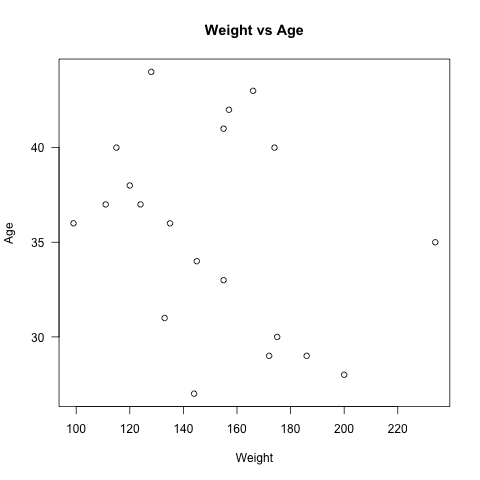

In [43]:
%%R
plot(weight, age, xlab="Weight", ylab="Age", main="Weight vs Age", las=1)